# Inspecting Water Quality in Gowanus Canal Over Time
Gowanus Canal is a small artificial waterway in Brooklyn famed for its toxicity.  It has been the subject of several newsworthy biological assays, and several controversial events, such as when a dolphin and a right whale swam into it and died. 

- cleanup efforts
- environmental anxiety
- improving or declining?
- no longer in use

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [30]:
harbor_quality = pd.read_csv('./data/Harbor_Water_Quality_20231215.csv')
boundaries = gpd.read_file("./data/Hydrography.geojson")

/var/folders/76/fwbywfj159x2s03lvczby1380000gn/T/ipykernel_42304/2078206039.py:1: DtypeWarning: Columns (1,5,6,7,10,11,12,13,20,26,27,35,36,37,38,39,40,41,46,48,49,50,51,52,53,54,57,59,60,61,63,64,65,67,68,70,76,77,79,94,95,97) have mixed types. Specify dtype option on import or set low_memory=False.
  harbor_quality = pd.read_csv('./data/Harbor_Water_Quality_20231215.csv')


In [31]:
print(list(harbor_quality.columns))

['Sampling Location', 'Duplicate Sample', 'Sample Date', 'Sample Time', 'Weather Condition (Dry or Wet)', 'Top Sample Temperature (ºC)', 'Bottom Sample Temperature (ºC)', 'Site Actual Depth (ft)', 'Top Sample Depth(ft)', 'Bottom Sample Depth (ft)', 'Top Salinity  (psu)', 'Bottom Salinity  (psu)', 'Top Conductivity (S/m)', 'Bottom Conductivity (S/m)', 'CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)', 'CTD (conductivity, temperature, depth profiler) Bottom Dissolved Oxygen (mg/L)', 'Percentage O2 Saturation Top Sample', 'Percentage O2 Saturation Bottom sample', 'Light Trans (% transparency) Top Sample', 'Light Trans (% transparency) Bottom Sample', 'Top Sigma-T (kg/m3)', 'Bottom Sigma-T (kg/m3)', 'Top Fluorometer (mg/m3)', 'Bottom Fluorometer mg/m3', 'CTD (conductivity, temperature, depth profiler) PH Top Sample', 'CTD (conductivity, temperature, depth profiler) PH Bottom Sample', 'Top Sample Photosysthetically Active Radiation Reference (400-700nm light (uE/

## Cleaning

In [32]:
harbor_quality['Lat'] = harbor_quality['Lat'].astype('float')
harbor_quality['Long'] = harbor_quality['Long'].astype('float')

In [33]:
harbor_quality['Year'] = pd.DatetimeIndex(harbor_quality['Sample Date']).year

## Looking

In [34]:
# Gowanus Canal:
lat_bounds = (40.650, 40.682)
long_bounds = (-74.020, -73.980)
year_range = (2016, 2021)

# Newtown Creek
# lat_bounds = (40.745520, 40.706779)
# long_bounds = (-73.961541, -73.914812)

In [35]:
latitude_filter = (harbor_quality['Lat']>=lat_bounds[0]) & (harbor_quality['Lat']<=lat_bounds[1])
longitude_filter = (harbor_quality['Long']>=long_bounds[0]) & (harbor_quality['Long']<=long_bounds[1])
year_filter = (harbor_quality['Year']>=year_range[0]) & (harbor_quality['Year']<=year_range[1])

In [36]:
gowanus_quality = harbor_quality[longitude_filter & latitude_filter & year_filter]

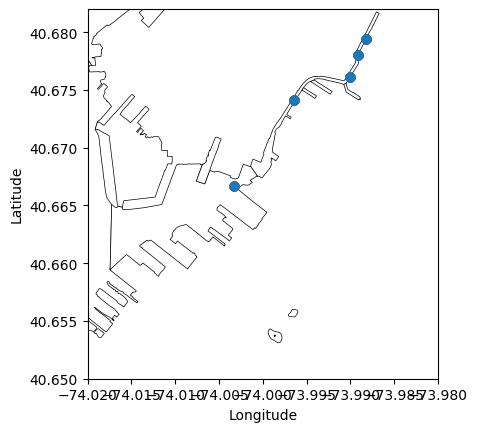

In [37]:
boundaries.plot(color="white", edgecolor="black", linewidth=0.5)
plt.scatter(gowanus_quality['Long'], gowanus_quality['Lat'], alpha=0.25)
plt.xlim(long_bounds)
plt.ylim(lat_bounds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();

In [38]:
gowanus_quality['Year']

307      2019
918      2020
2936     2017
14713    2017
18049    2018
         ... 
91336    2018
91472    2019
91473    2020
91489    2018
91650    2020
Name: Year, Length: 637, dtype: int32

In [39]:
measurement_frequencies = gowanus_quality['Year'].value_counts()

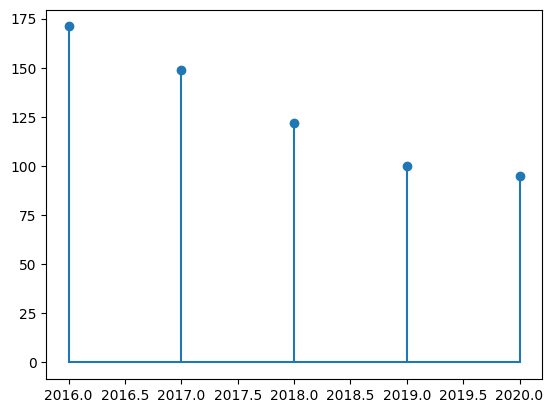

In [40]:
plt.stem(measurement_frequencies.index.to_series(), measurement_frequencies, basefmt='');